<a href="https://colab.research.google.com/github/arpit7714/linearregression/blob/master/conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
#importing mnist data set
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
def weights(shape2):
  var= tf.truncated_normal(shape2,stddev=0.1)
  return tf.Variable(var)
def bias(shape1):
  var=tf.constant(0.1,shape=shape1)
  return tf.Variable(var)
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])
dropout=0.75
keep_prob=tf.placeholder(tf.float32)

In [0]:
def conv2d(x,W):
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
#ksize = kernel size
def pooling(x):
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


In [0]:
#first convoluion layer
#[frame_height,frame_width,number_of_channel,number_of_filter]
w1=weights([5,5,1,32])
b1=bias([32])

#tensorflow conv2d function expects a 4d tensor with dimention corresponds to 
#batch_size, height,width,no. channel
image=tf.reshape(X,[-1,28,28,1])
#relu function is used to remove the negative pixel values from the result
#------------(not varified bias is added to reflect the some greay color-------------
conv1=tf.nn.relu(conv2d(image,w1)+b1)
#conv1 dimention ==[-1,28,28,32]
pool1=pooling(conv1)
#pool1 dimention ==[-1,14,14,32]


#second convolution layer
w2=weights([5,5,32,64])
b2=bias([64])
conv2=tf.nn.relu(conv2d(pool1,w2)+b2)
#dimentions==[-1,14,14,64]     
pool2=pooling(conv2)
#dimention==[-1,7,7,64]

# fully connected layers
#first fully connected layer with 1024 nerons
weight_fc1=weights([7*7*64,1024])
bias_fc1=bias([1024])

pool2_flat=tf.reshape(pool2,[-1,7*7*64])
fc1=tf.nn.relu(tf.matmul(pool2_flat,weight_fc1) + bias_fc1)
layer_drop=tf.nn.dropout(fc1,keep_prob)

#second fully connected layer

weight_fc2=weights([1024,10])
bias_fc2=bias([10])

fc2= tf.matmul(layer_drop,weight_fc2) + bias_fc2
#need not to use the softmax function to produce the vector of 10 units
#cost will contain that function


In [5]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=fc2))

optimize=tf.train.AdamOptimizer(1e-4).minimize(cost)

prediction=tf.equal(tf.argmax(fc2,1) , tf.argmax(Y,1))

#tf.cast convert the boolean array into the ones and zeros 

accuracy=tf.reduce_mean(tf.cast(prediction,tf.float32))

predict=tf.equal(tf.argmax(fc2,1),tf.argmax(Y,1)) 

accu=tf.reduce_mean(tf.cast(predict,tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



iteration 0 loss 8.739628  Accuracy 0.06
iteration 100 loss 0.46177724  Accuracy 0.84
iteration 200 loss 0.39799  Accuracy 0.9
iteration 300 loss 0.28570685  Accuracy 0.88
iteration 400 loss 0.16542798  Accuracy 0.94
iteration 500 loss 0.21562175  Accuracy 0.96
iteration 600 loss 0.10143356  Accuracy 0.98
iteration 700 loss 0.13867007  Accuracy 0.94
iteration 800 loss 0.097212724  Accuracy 0.98
iteration 900 loss 0.045243762  Accuracy 0.98
iteration 1000 loss 0.041882083  Accuracy 1.0
iteration 1100 loss 0.11635913  Accuracy 0.96
iteration 1200 loss 0.06042923  Accuracy 1.0
iteration 1300 loss 0.061987523  Accuracy 0.98
iteration 1400 loss 0.07336662  Accuracy 0.98
iteration 1500 loss 0.029267693  Accuracy 0.98
iteration 1600 loss 0.072741225  Accuracy 0.96
iteration 1700 loss 0.09552993  Accuracy 0.98
iteration 1800 loss 0.032404963  Accuracy 1.0
iteration 1900 loss 0.15393448  Accuracy 0.96


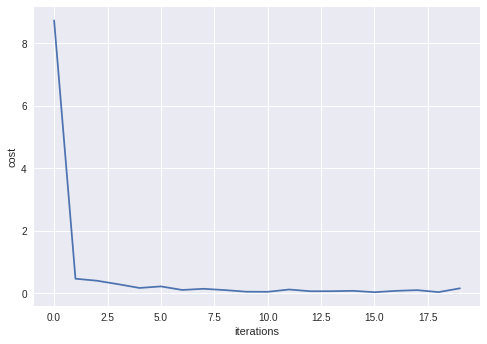

In [6]:
import matplotlib.pyplot as plt
sess=tf.Session()
sess.run(tf.global_variables_initializer())
costlist=[]
for i in range(2000):
    #batch_size==100
    batch_x,batch_y=mnist.train.next_batch(50)
    sess.run(optimize,feed_dict={X:batch_x,Y:batch_y,keep_prob:dropout})
    if i%100==0:
      minibatch_loss,minibatch_accuracy=sess.run([cost,accuracy],feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
      print("iteration",str(i),"loss",minibatch_loss," Accuracy",minibatch_accuracy)
      costlist.append(minibatch_loss)    
num=[]
for j in range(20):
  num.append(j)
plt.plot(num,costlist)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

In [7]:
img1=mnist.test.images
print(sess.run(accu,feed_dict={X:img1,Y:mnist.test.labels,keep_prob:1.0}))

0.9777
